# HNCDI Explain: Mathematical Fundamentals of Quantum Computing

### Install the qiskit library in the colab environment

Please run the below cell to ensure the notebook has qiskit installed.

In [1]:
# Install the qiskit library
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 5.3 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: pylatexenc is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for pylatexenc ... done

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --u

### Import the necessary modules from the Qiskit library


In [2]:
import numpy as np
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as real_sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
# from qiskit import assemble
import matplotlib.pyplot as plt

### Authenticate with IBM quantum

You will require the API token specified in the IBM quantum platform to ensure you can execute your code on a real quantum computer.

In [ ]:
my_token = "<Enter your IBM quantum token here>"

service = QiskitRuntimeService(channel="ibm_quantum", token=my_token)

/var/folders/7p/yp3_4bhx1hb234hbhxty04tr0000gn/T/ipykernel_47376/1134007162.py:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum", token=my_token)


## Tutorial 1: Create a Bell state on a Simulator and on IBMQ

## Create your Bell state circuit

In [4]:
# Create your Bell state circuit

number_of_qubits = 2 #TODO: add qubits
number_of_classical_bits = 2#TODO: add classical bits

qreg_q = QuantumRegister(number_of_qubits, 'q')
creg_c = ClassicalRegister(number_of_classical_bits, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Submit Bell state circuit to a simulator

In [5]:
simulator_backend = AerSimulator()

In [6]:
# Submit job to simulator backend
simulator_job = simulator_backend.run(circuit, shots=1024).result()

In [7]:
# List measurement outcomes
simulator_job_counts = simulator_job.get_counts()
simulator_job_counts

{'11': 545, '00': 479}

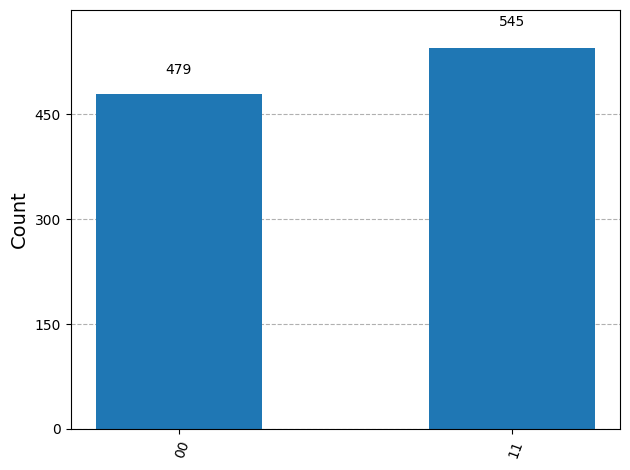

In [8]:
# Plot measurement outcomes 
plot_histogram(simulator_job_counts)

## Submit your Bell state circuit to real quantum hardware

In [9]:
# View backends
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>]

In [10]:
# Find least busy machine to submit a job to. Set IBMQ backend to this machine.
backend = service.least_busy(operational=True, simulator=False)
sampler = real_sampler(backend)

In [11]:
# Transpile your circuit for the IBMQ backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: 3π/4
          ┌─────────┐┌────┐          ┌──────┐┌───┐┌─┐
q_0 -> 18 ┤ Rz(π/2) ├┤ √X ├──────────┤0     ├┤ X ├┤M├
          └┬────────┤├────┤┌────────┐│  Ecr │└┬─┬┘└╥┘
q_1 -> 19 ─┤ Rz(-π) ├┤ √X ├┤ Rz(-π) ├┤1     ├─┤M├──╫─
           └────────┘└────┘└────────┘└──────┘ └╥┘  ║ 
     c: 2/═════════════════════════════════════╩═══╩═
                                               1   0

In [12]:
# Submit job to IBMQ backend
job = sampler.run([transpiled_circuit], shots=1024)
results = job.result()

In [13]:
# List measurement outcomes
result = results[0].data.c
measurements = result.get_counts()
measurements

{'01': 14, '11': 524, '00': 480, '10': 6}

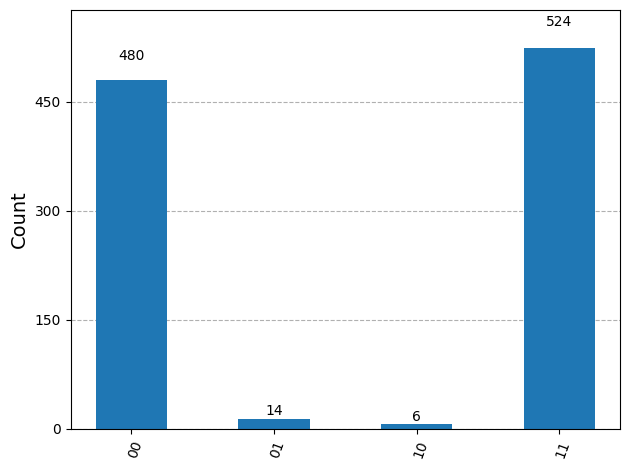

In [14]:
# Plot measurement outcomes
plot_histogram(measurements)